# DA3-A3 
## Parker & Co. -1
Peter Szilvasi,
Máté Schieszler 

In [111]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import warnings

warnings.filterwarnings("ignore")

In [112]:
from py_helper_functions import *

In [113]:
# Read in the data offline
original_data = pd.read_csv('cs_bisnode_panel.csv')

In [114]:
# Read in the data online
#original_data = pd.read_csv('https://raw.githubusercontent.com/mateschieszler/DA3-A3/main/cs_bisnode_panel.csv')

In [115]:
# copy original so we don't have to reload it every time (it takes more than 10s)
data = original_data.copy()

In [116]:
# filter out ind2 != 26
# data = data.loc[data['ind2'] == 26] # i would comment this out 
data['sales'].fillna(0, inplace=True)
data.shape

(287829, 48)

In [117]:
# add all missing year and comp_id combinations -
# originally missing combinations will have NAs in all other columns
data = (
    data.set_index(["year", "comp_id"])
    .unstack(fill_value="toReplace")
    .stack()
    .reset_index()
)
data = data.replace("toReplace", np.nan)  # only way I could define it as NaN

In [118]:
# generate status_alive; if sales larger than zero and not-NA, then firm is alive
data["status_alive"] = (data["sales"] > 0 & (False == data["sales"].isna())).astype(int)

# defaults in one year if there are sales in this year but no sales the next year
# Status_in_a_year: data.groupby('comp_id')['status_alive'].shift(-1)
data["default"] = (
    (data["status_alive"] == 1)
    & (data.groupby("comp_id")["status_alive"].shift(-1) == 0)
).astype(int)

In [119]:
holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0


In [120]:
data.shape

(556944, 50)

In [121]:
# with this -> data = working set
# data = data.drop(holdout_set.index)

## Handling Missing Values

In [122]:
# drop year 2015 and 2016
data = data.loc[data['year'] <= 2014]

In [123]:
# look at missing values
data.isna().sum()

year                         0
comp_id                      0
begin                   213540
end                     213540
COGS                    447164
amort                   221485
curr_assets             213665
curr_liab               213665
extra_exp               222292
extra_inc               222292
extra_profit_loss       220962
finished_prod           447884
fixed_assets            213665
inc_bef_tax             220951
intang_assets           213674
inventories             213665
liq_assets              213665
material_exp            221485
net_dom_sales           447164
net_exp_sales           447164
personnel_exp           221485
profit_loss_year        213665
sales                   213540
share_eq                213665
subscribed_cap          213665
tang_assets             215004
wages                   447416
D                       464120
balsheet_flag           213540
balsheet_length         213540
balsheet_notfullyear    213540
founded_year            268057
exit_yea

In [124]:
# Calculate percentage of missing values in each column of the original dataset
original_missing_percentage = (original_data.isnull().sum() / len(original_data)) * 100

# Calculate percentage of missing values in each column of the filtered dataset
filtered_missing_percentage = (data.isnull().sum() / len(data)) * 100

# Calculate percentage of missing values in each column of the filtered dataset
filtered_missing_percentage = (data.isnull().sum() / len(data)) * 100

# Combine the missing percentage information into a DataFrame for easier comparison
missing_info = pd.DataFrame({
    'Original Data Missing %': original_missing_percentage,
    'Filtered Data Missing %': filtered_missing_percentage
})

missing_info.sort_values(by='Filtered Data Missing %', ascending=False)

,Original Data Missing %,Filtered Data Missing %
D,100.000000,100.000000
finished_prod,93.925213,96.501767
wages,93.752193,96.400931
COGS,93.656998,96.346634
net_exp_sales,93.656998,96.346634
net_dom_sales,93.656998,96.346634
exit_year,86.499276,91.726924
exit_date,80.481466,88.024864
labor_avg,50.909394,75.508489
birth_year,38.848761,68.898776


Would it makes sense to examine all original data as it might have some additinal info which might uncover relations that are not present in our data?

In [125]:
# drop columns with over 12000 missing values
to_drop = ['D','exit_year','wages','finished_prod','COGS','net_exp_sales','net_dom_sales','exit_date']
data = data.drop(to_drop, axis=1)

In [126]:
# drop where industry is empty, itt nem tudom ezt kell e, vagy csak flageljük
data = data.dropna(subset="ind2")

In [127]:
data

,year,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,status_alive,default
0,2005,1.001034e+06,2005-01-01,2005-12-31,692.592590,7.266667e+03,7.574074e+03,0.000000,0.000000,0.000000,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,1,0
3,2005,1.003200e+06,2005-01-01,2005-12-31,25.925926,7.296296e+02,3.803704e+03,0.000000,4814.814941,4814.814941,...,NaN,5630.0,56.0,3.0,1.0,Central,2003-10-21,NaN,1,0
4,2005,1.004012e+06,2005-01-01,2005-12-31,114.814812,1.648148e+03,3.777778e+03,0.000000,0.000000,0.000000,...,Domestic,3314.0,33.0,2.0,3.0,West,1991-11-24,NaN,1,0
7,2005,1.011889e+06,2005-01-01,2005-12-31,51625.925781,3.500370e+04,4.988889e+03,0.000000,31925.925781,31925.925781,...,Domestic,5510.0,55.0,3.0,2.0,West,1992-11-09,NaN,1,0
8,2005,1.014183e+06,2005-01-01,2005-12-31,12692.592773,7.918889e+04,2.777778e+03,0.000000,1481.481445,1481.481445,...,Domestic,5510.0,55.0,3.0,2.0,Central,2001-12-21,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464112,2014,4.639820e+11,2014-01-01,2014-12-31,7551.852051,8.765185e+04,1.156741e+05,0.000000,0.000000,0.000000,...,Domestic,2822.0,28.0,2.0,1.0,Central,1995-05-14,0.597222,1,0
464114,2014,4.640212e+11,2014-01-01,2014-12-31,5666.666504,1.528519e+04,1.488889e+03,0.000000,0.000000,0.000000,...,Domestic,2822.0,28.0,2.0,2.0,Central,2006-05-09,0.101852,1,0
464115,2014,4.640446e+11,2014-01-01,2014-12-31,71570.367188,6.486366e+06,2.499133e+06,0.000000,0.000000,0.000000,...,Foreign,3312.0,33.0,2.0,3.0,Central,2008-10-09,2.305556,1,0
464118,2014,4.641050e+11,2014-01-01,2014-12-31,1088.888916,5.009630e+04,1.375556e+04,55.555557,0.000000,-55.555557,...,Domestic,5610.0,56.0,3.0,3.0,West,1989-04-28,1.131944,1,0


# Label Engineering

In [128]:
# add all missing year and comp_id combinations -
# originally missing combinations will have NAs in all other columns
data = (
    data.set_index(["year", "comp_id"])
    .unstack(fill_value="toReplace")
    .stack()
    .reset_index()
)
data = data.replace("toReplace", np.nan)  # only way I could define it as NaN 
##### this we do twice i think, should drop if its true

In [129]:
data["default"].describe()

count    249554.000000
mean          0.095478
std           0.293875
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

In [130]:
data["sales"].describe()

count    2.495540e+05
mean     4.693274e+05
std      3.803055e+06
min     -1.472559e+07
25%      3.485185e+03
50%      2.800000e+04
75%      1.041593e+05
max      1.110294e+08
Name: sales, dtype: float64

In [131]:
data["sales"] = np.where(
    data["sales"] < 0, 1, data["sales"]
)  # Replaces negative values in the "sales" column with 1
data = data.assign( # Assigns new columns to the data
    ln_sales=np.where( # Natural logarithm of sales if sales is larger than 0
        data["sales"] > 0, 
        np.log(data["sales"]), 
        (np.where(data["sales"].isna(), np.nan, 0))),  # NaN remain NaN
    sales_mil=data["sales"] / 1000000, # Sales in millions
    sales_mil_log=np.where( # Natural logarithm of sales in millions if sales is larger than 0
        data["sales"] > 0, 
        np.log(data["sales"] / 1000000),
        (np.where(data["sales"].isna(), np.nan, 0)), # NaN remain NaN
    ),
)

In [132]:
# This difference indicates how the logarithm of sales in millions changes from one period to the next for each company.
# It's often used to capture the rate of change or momentum in a time series.
data["d1_sales_mil_log"] = data["sales_mil_log"] - data.groupby("comp_id")[
    "sales_mil_log"
].shift(1)

In [133]:
# replace w 0 for new firms + add dummy to capture it

# add age of firm
data["age"] = np.where(
    data["year"] - data["founded_year"] < 0, 0, data["year"] - data["founded_year"])

# add dummy for new firms
data["new"] = np.where(
    ((data["age"] <= 1) | (data["balsheet_notfullyear"] == 1)),
    1,
    (np.where(data["age"].isna(), np.nan, 0)))

# replace d1_sales_mil_log with 0 for new firms
data["d1_sales_mil_log"] = np.where(
    data["new"] == 1, 0, np.where(data["new"].isna(), np.nan, data["d1_sales_mil_log"]))

# replace new with 0 for firms with missing d1_sales_mil_log
data["new"] = np.where(data["d1_sales_mil_log"].isna(), 1, data["new"])

# replace d1_sales_mil_log with 0 for firms with missing d1_sales_mil_log
data["d1_sales_mil_log"] = np.where(
    data["d1_sales_mil_log"].isna(), 0, data["d1_sales_mil_log"])

# Feature Engineering

In [134]:
# Firm characteristics
data["age2"] = data["age"] ** 2
data["foreign_management"] = np.where(
    data["foreign"] >= 0.5, 1, np.where(data["foreign"].isna(), np.nan, 0)
)
data["gender_m"] = data["gender"].astype("category")
data["m_region_loc"] = data["region_m"].astype("category")

In [135]:
###########################################################
# look at more financial variables, create ratios
###########################################################

# assets can't be negative. Change them to 0 and add a flag.
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"] < 0)
        | (data["curr_assets"] < 0)
        | (data["fixed_assets"] < 0)
    ),
    1,
    0,
)
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"].isna())
        | (data["curr_assets"].isna())
        | (data["fixed_assets"].isna())
    ),
    np.nan,
    data["flag_asset_problem"],
)
data.groupby("flag_asset_problem").count()["comp_id"]

flag_asset_problem
0.0    249215
1.0       206
Name: comp_id, dtype: int64

In [136]:
data["intang_assets"] = np.where(data["intang_assets"] < 0, 0, data["intang_assets"])
data["curr_assets"] = np.where(data["curr_assets"] < 0, 0, data["curr_assets"])
data["fixed_assets"] = np.where(data["fixed_assets"] < 0, 0, data["fixed_assets"])

In [137]:
# generate total assets
data["total_assets_bs"] = (
    data["intang_assets"] + data["curr_assets"] + data["fixed_assets"]
)
data["total_assets_bs"].describe()

count    2.494210e+05
mean     5.864526e+05
std      2.759281e+07
min      0.000000e+00
25%      4.377778e+03
50%      1.859259e+04
75%      8.020000e+04
max      1.032471e+10
Name: total_assets_bs, dtype: float64

In [138]:
pl_names = [
    "extra_exp",
    "extra_inc",
    "extra_profit_loss",
    "inc_bef_tax",
    "inventories",
    "material_exp",
    "profit_loss_year",
    "personnel_exp",
]
bs_names = [
    "intang_assets",
    "curr_liab",
    "fixed_assets",
    "liq_assets",
    "curr_assets",
    "share_eq",
    "subscribed_cap",
    "tang_assets",
]

In [139]:
# divide all pl_names elements by sales and create new column for it
data[[col + "_pl" for col in pl_names]] = data[pl_names].div(
    data["sales"], axis="index"
)

In [140]:
# divide all bs_names elements by total_assets_bs and create new column for it
data[[col + "_bs" for col in bs_names]] = (
    data[bs_names]
    .div(data["total_assets_bs"], axis="index")
    .replace((np.inf, -np.inf, np.nan), (0, 0, 0))
)
# get Nan values where total_assets_bs is NaN
for col in bs_names:
    data[col + "_bs"] = np.where(
        data["total_assets_bs"].isna(), np.nan, data[col + "_bs"]
    )

In [141]:
########################################################################
# creating flags, and winsorizing tails
########################################################################

# Variables that represent accounting items that cannot be negative (e.g. materials)
zero = [
    "extra_exp_pl",
    "extra_inc_pl",
    "inventories_pl",
    "material_exp_pl",
    "personnel_exp_pl",
    "curr_liab_bs",
    "fixed_assets_bs",
    "liq_assets_bs",
    "curr_assets_bs",
    "subscribed_cap_bs",
    "intang_assets_bs",
]

data[[col + "_flag_high" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] > 1).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] > 1, 1, data[zero])
)
data[[col + "_flag_error" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] < 0).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] < 0, 0, data[zero])
)

In [142]:
# for vars that could be any, but are mostly between -1 and 1
anyof = ["extra_profit_loss_pl", "inc_bef_tax_pl", "profit_loss_year_pl", "share_eq_bs"]

data[[col + "_flag_low" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] < -1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] < -1), -1, data[anyof])
)
data[[col + "_flag_high" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] > 1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] > 1), 1, data[anyof])
)
data[[col + "_flag_zero" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] == 0).astype(int)
)
data[[col + "_quad" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, data[anyof] ** 2
)

In [143]:
# dropping flags with no variation
flag_columns = [col for col in data.columns if "flag" in col]
data = data.drop(
    data[flag_columns].std()[(data[flag_columns].std() == 0)].index, axis=1
)

In [144]:
########################################################################
# additional
# including some imputation
########################################################################

# CEO age
data["ceo_age"] = data["year"] - data["birth_year"]
data = data.assign(
    flag_low_ceo_age=(data["ceo_age"] < 25).astype(int),
    flag_high_ceo_age=(data["ceo_age"] > 75).astype(int),
    flag_miss_ceo_age=(data["ceo_age"].isna()).astype(int),
)


data["ceo_age"] = np.where(data["ceo_age"] < 25, 25, data["ceo_age"])
data["ceo_age"] = np.where(data["ceo_age"] > 75, 75, data["ceo_age"])
data["ceo_age"] = np.where(
    data["ceo_age"].isna(), data["ceo_age"].mean(), data["ceo_age"]
)
data["ceo_young"] = (data["ceo_age"] < 40).astype(int)

In [145]:
# number emp, very noisy measure
data["labor_avg_mod"] = np.where(
    data["labor_avg"].isna(), data["labor_avg"].mean(), data["labor_avg"]
)
data["flag_miss_labor_avg"] = (data["labor_avg"].isna()).astype(int)

In [146]:
# data = data.drop(["labor_avg"], axis=1) ez Gáboréban benne van, de nem tudom miért

In [147]:
# create category type variables
data["urban_m"] = data["urban_m"].astype("category")
data["default_f"] = data["default"].astype("category")
data["default_f"] = data["default_f"].cat.rename_categories(["no_default", "default"])

In [148]:
########################################################################
# sales
########################################################################
data["sales_mil_log_sq"] = data["sales_mil_log"] ** 2

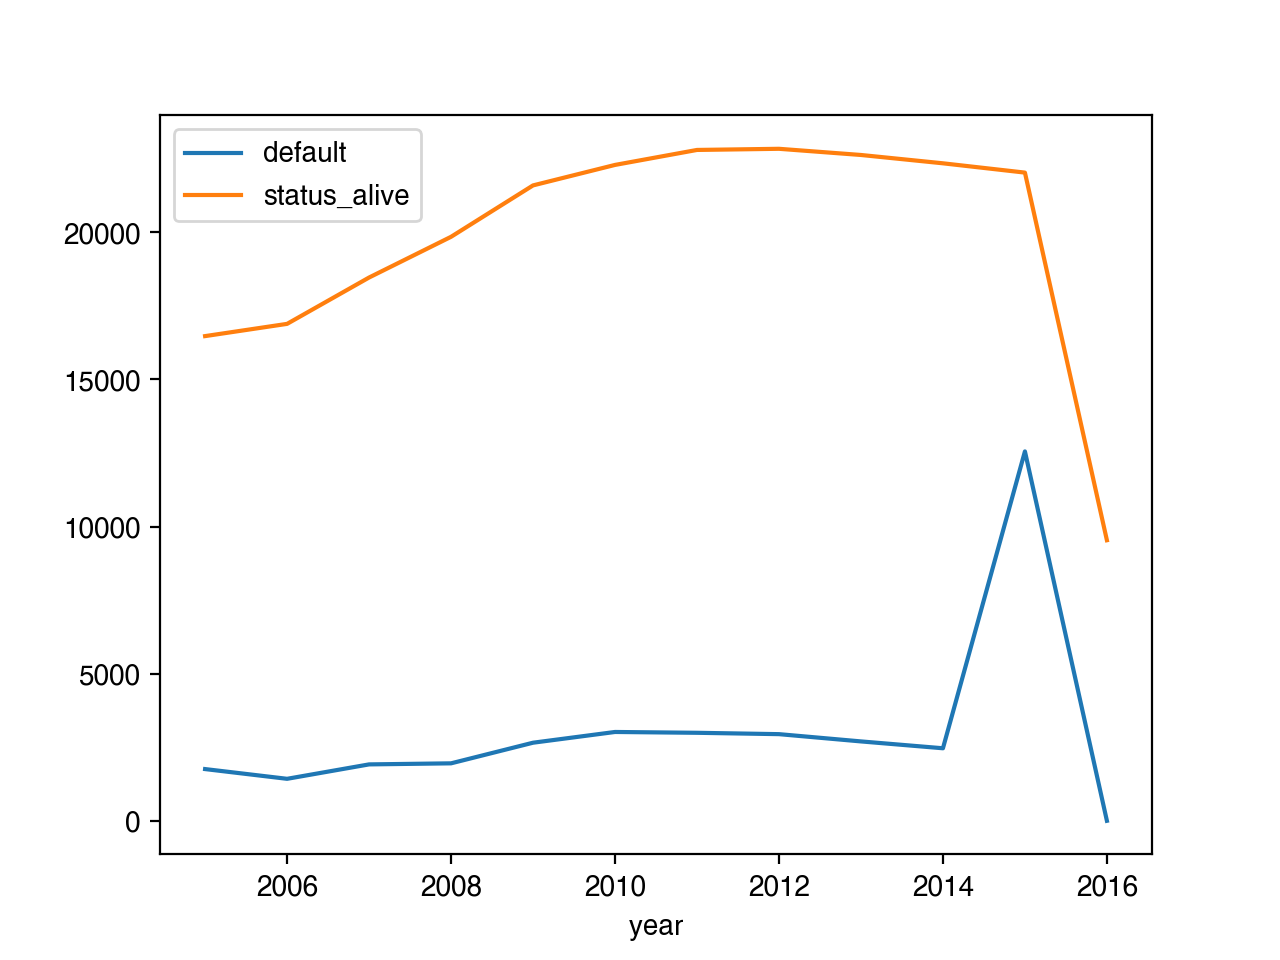

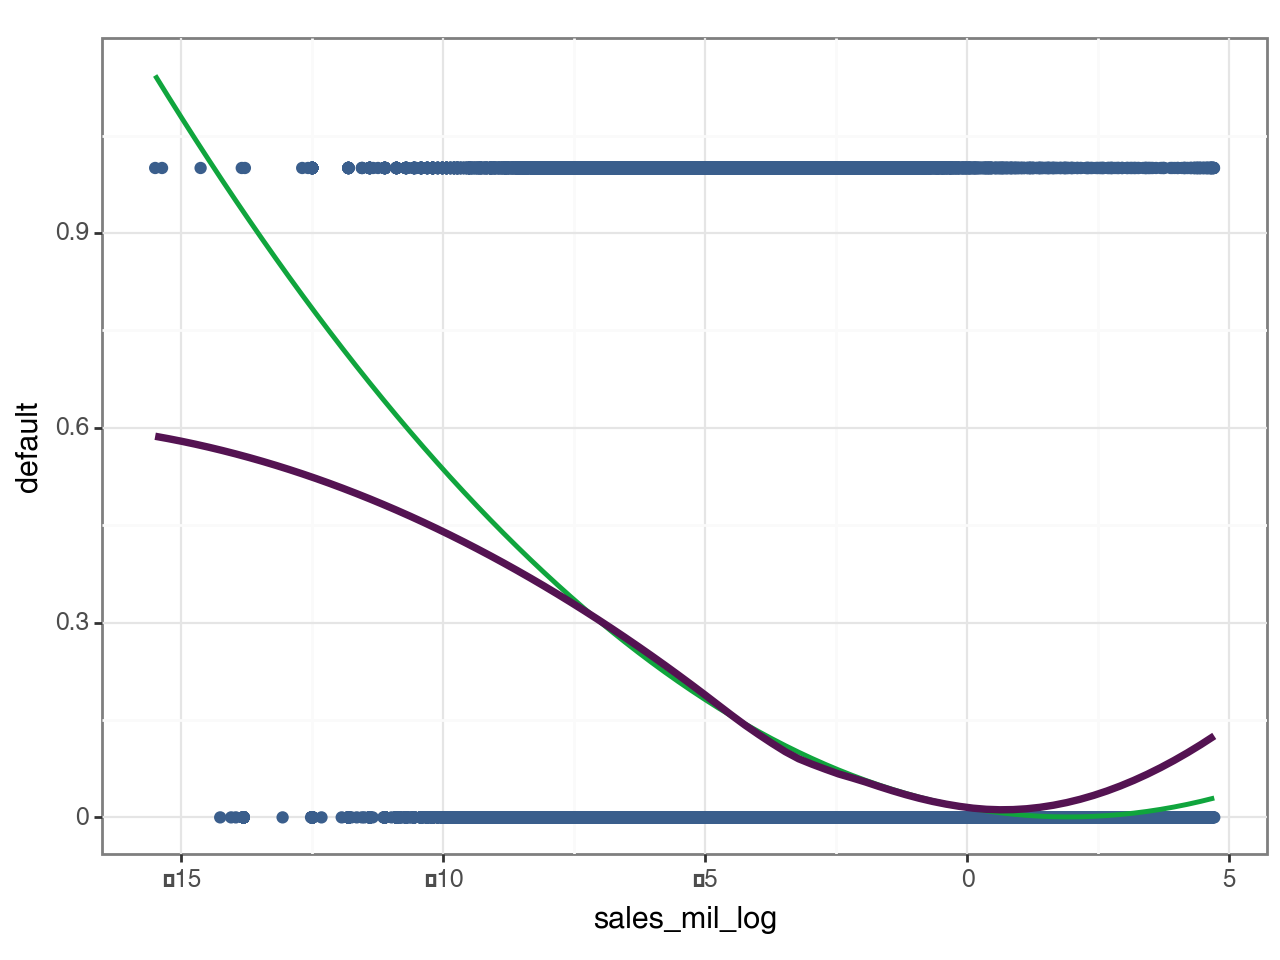

<Figure Size: (640 x 480)>

In [149]:
(
    ggplot(data, aes(x="sales_mil_log", y="default"))
    + geom_point(color=color[0])
    + geom_smooth(method="lm", formula="y ~ x + I(x**2)", color=color[1], se=False)
    + geom_smooth(method="loess", color=color[2], se=False, size=1.5, span=0.9)
    + labs(x="sales_mil_log", y="default")
    + theme_bw()
)

In [150]:
# Linear regressions
ols_s = smf.ols("default ~ sales_mil_log + sales_mil_log_sq", data=data).fit()
print(ols_s.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:04:27   Log-Likelihood:                -37703.
No. Observations:              249554   AIC:                         7.541e+04
Df Residuals:                  249551   BIC:                         7.544e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0147      0.001  

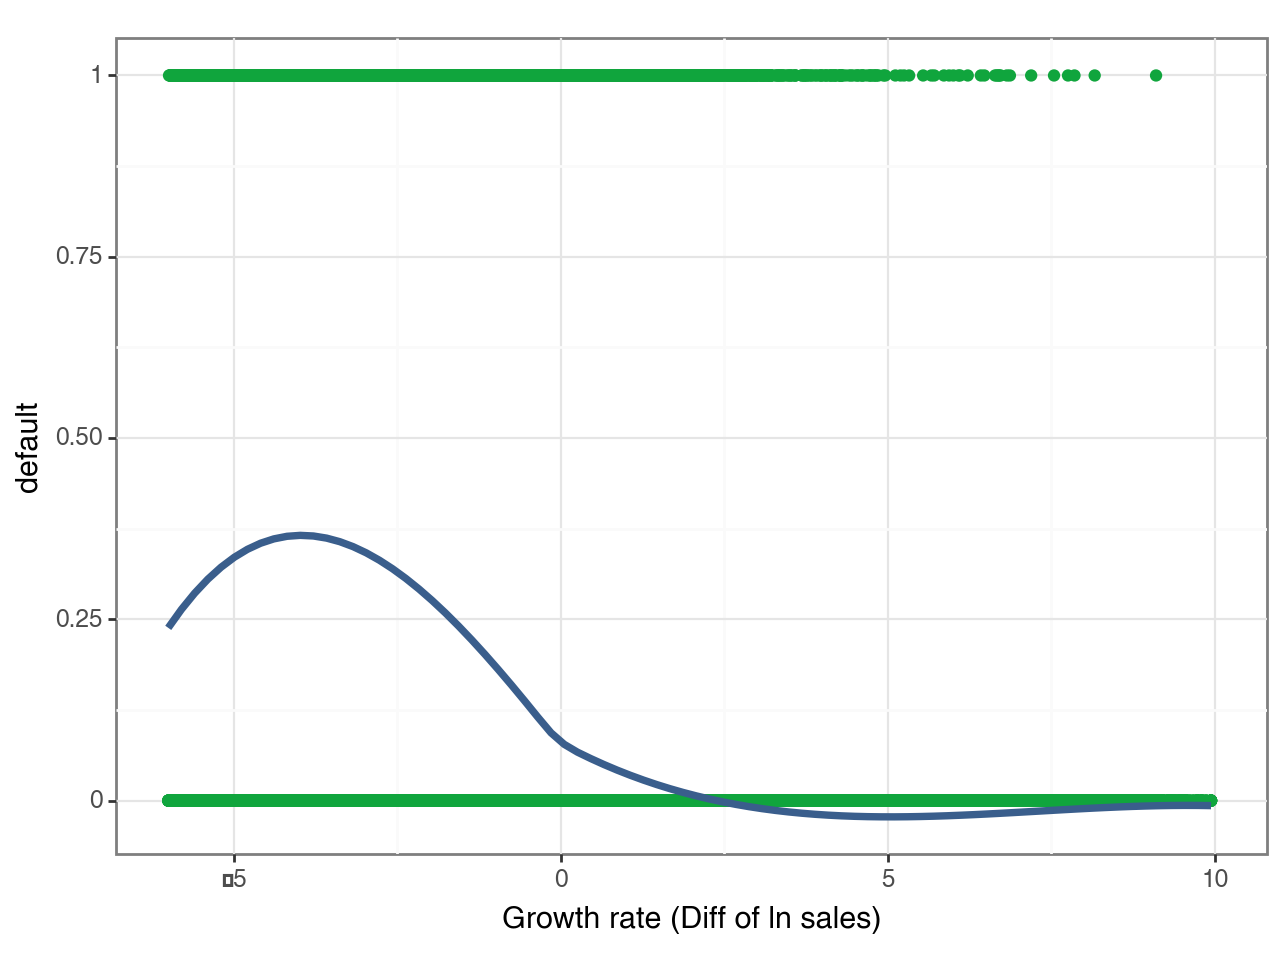

<Figure Size: (640 x 480)>

In [151]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="default"))
    + geom_point(color=color[1])
    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-6, 10), breaks=seq(-5, 10, by=5))
    + theme_bw()
)

In [152]:
# generate variables ---------------------------------------------------

data["flag_low_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] < -1.5, 1, 0)
data["flag_high_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] > 1.5, 1, 0)
data["d1_sales_mil_log_mod"] = np.where(
    data["d1_sales_mil_log"] < -1.5,
    -1.5,
    np.where(data["d1_sales_mil_log"] > 1.5, 1.5, data["d1_sales_mil_log"]),
)
data["d1_sales_mil_log_mod_sq"] = data["d1_sales_mil_log_mod"] ** 2

In [153]:
# no more imputation, drop obs if key vars missing
# data = data.dropna(subset=["liq_assets_bs", "foreign", "ind"])

# ha ezt belerakjuk akkor elcsúszik a holdout set megvizsgáltam úgy hogy előtte beillesztettem a holdout set-es részt és utána is

In [154]:
# drop missing
# data = data.dropna(subset=["age", "foreign", "material_exp_pl", "m_region_loc"])
# data["age"].describe()

# ha ezt belerakjuk akkor elcsúszik a holdout set megvizsgáltam úgy hogy előtte beillesztettem a holdout set-es részt és utána is


In [155]:
# drop unused factor levels
for col in data.select_dtypes(include=["category"]).columns:
    data[col] = data[col].cat.remove_unused_categories()

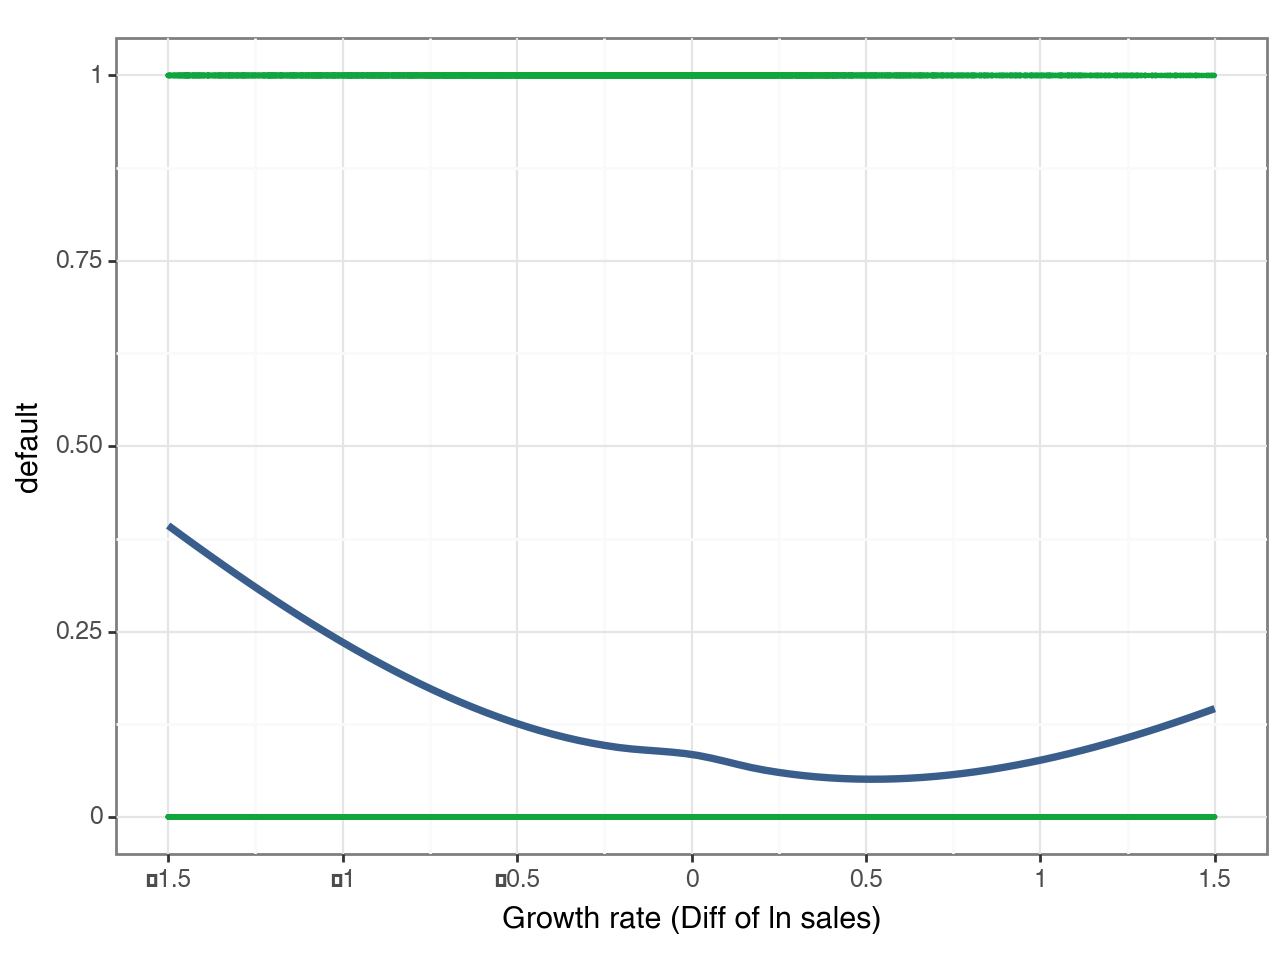

<Figure Size: (640 x 480)>

In [156]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="default"))
    + geom_point(size=0.1, color=color[1])
    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-1.5, 1.5), breaks=seq(-1.5, 1.5, by=0.5))
    + theme_bw()
)

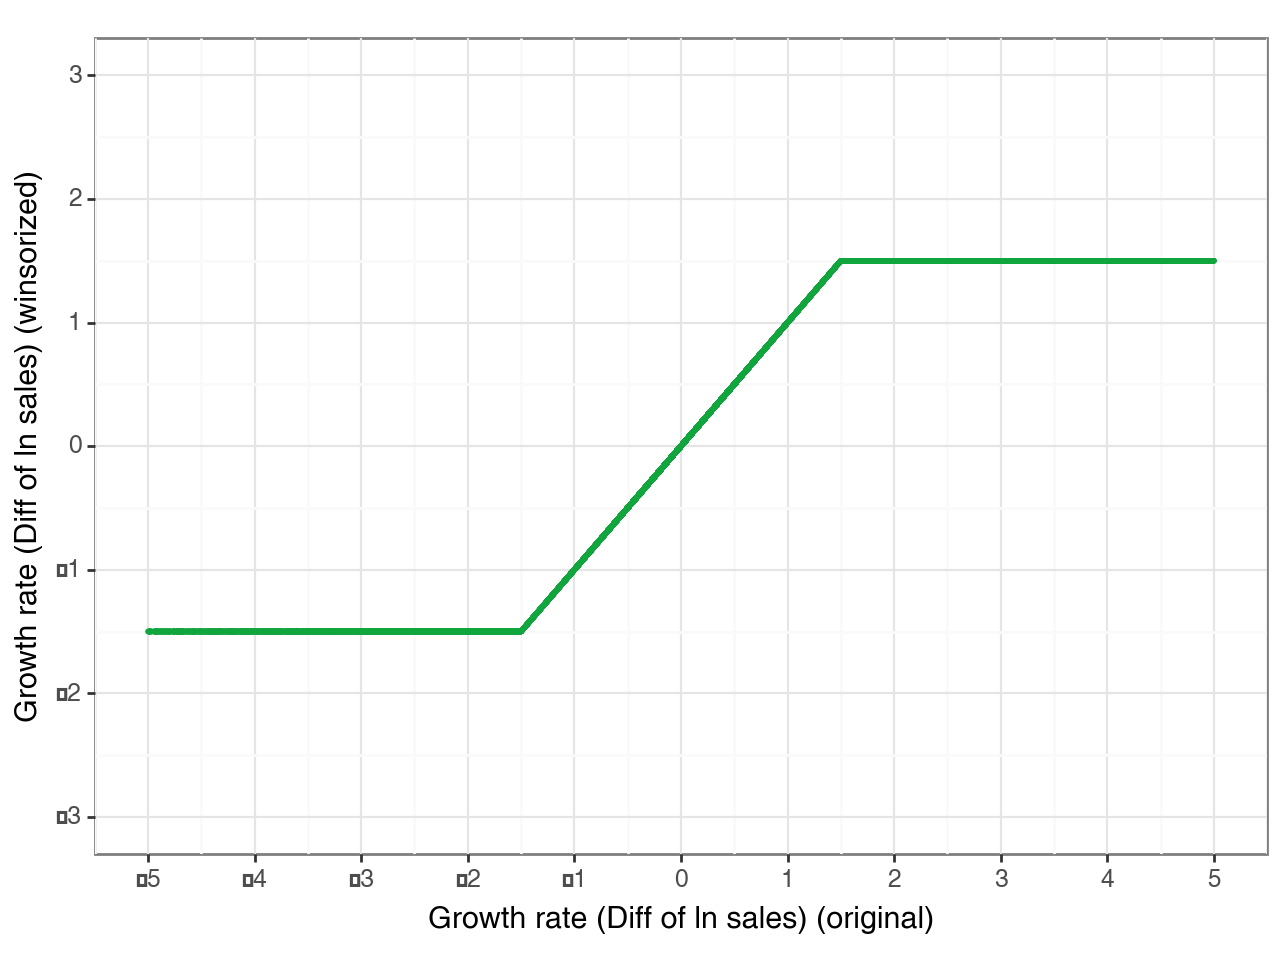

<Figure Size: (640 x 480)>

In [157]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="d1_sales_mil_log_mod"))
    + geom_point(size=0.1, color=color[1])
    + labs(
        x="Growth rate (Diff of ln sales) (original)",
        y="Growth rate (Diff of ln sales) (winsorized)",
    )
    + scale_x_continuous(limits=(-5, 5), breaks=seq(-5, 5, by=1))
    + scale_y_continuous(limits=(-3, 3), breaks=seq(-3, 3, by=1))
    + theme_bw()
)

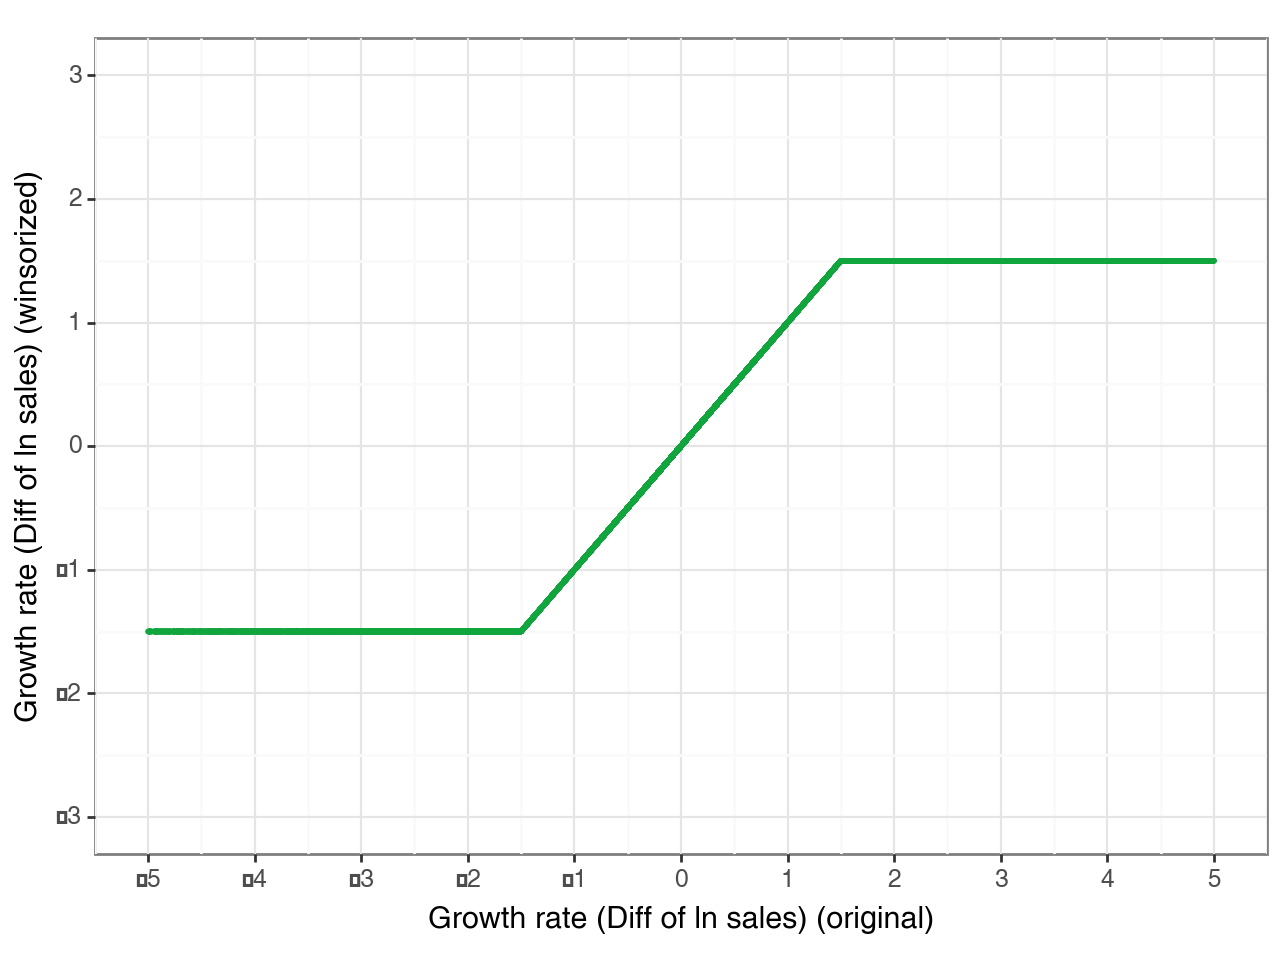

<Figure Size: (640 x 480)>

In [158]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="d1_sales_mil_log_mod"))
    + geom_point(size=0.1, color=color[1])
    + labs(
        x="Growth rate (Diff of ln sales) (original)",
        y="Growth rate (Diff of ln sales) (winsorized)",
    )
    + scale_x_continuous(limits=(-5, 5), breaks=seq(-5, 5, by=1))
    + scale_y_continuous(limits=(-3, 3), breaks=seq(-3, 3, by=1))
    + theme_bw()
)

In [159]:
# look at firms below 10m euro revenues and above 1000 euros (SME filtering)
#data = data.loc[(data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# EDA

In [160]:
data[['year','comp_id']].groupby('year').nunique()

,comp_id
year,
2005,44227
2006,44227
2007,44227
2008,44227
2009,44227
2010,44227
2011,44227
2012,44227
2013,44227


In [161]:
data[['year','default','status_alive']].groupby('year').sum()

,default,status_alive
year,,
2005,1758.0,16473.0
2006,1427.0,16889.0
2007,1917.0,18464.0
2008,1953.0,19848.0
2009,2654.0,21595.0
2010,3019.0,22291.0
2011,2991.0,22800.0
2012,2945.0,22839.0
2013,2698.0,22629.0


In [162]:
data[['year','default','status_alive']].groupby('year').sum().plot(kind='line')

<Axes: xlabel='year'>

In [163]:
data.default.mean()

0.0954783333466905

# Construction of the holdout set

We are only interested in predicting default for ‘ind2 == 26’, which is the selected industry, and the
firm is a small or medium enterprise (SME). Thus, yearly sales in 2014 was between 1000 EUR and 10
million EUR.

Existed in 2014 (sales > 0), but did not exists in 2015 (sales is 0 or missing)

If you do the sample design properly:
- you have an overall of 1037 firms.
- 56 firms defaulted
- 981 stayed alive. 
- The average sales of the firms is 0.4902 million EUR, with the minimum of 0.00107 million
EUR and 9.57648 million EUR.

In [164]:
# Creating the holdout set
holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0



# Kérdések
- jó e az a szűrés hogy ind2 csak 26, nem lehet se empty se semmi más
- 1 évet nézünk vagy többet?
    - ha többet nézünk akkor rakhatnánk bele olyan változókat amik valamiféle trendeket, változásokat vagy több éven keresztüli átlagokat mutatnak

- SME sales-t vizsgálni
- CEU age 75? sokallom
    - itt olyan gondolatom van hogy majd a modellek fine tuneolálásnál az ilyen apró dolgok megváltoztatásával tudjuk egyedivé tenni a modellt
- Milyen hatása van az stack unstacknek? igazából csinál egy csomó NA sort, de ez alapján nem szabad megítélni h melyik sorban mennyi a hiányzó érték, inkább a default+aliveval lehetne talán - az se biztos, hogy jó
